<a href="https://colab.research.google.com/github/tsparaskevas/ML_EDDE2/blob/main/Homework9-Tweets/nd_syriza_tweets_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import Libraries**

In [1]:
import pandas as pd
import numpy as np 

from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


##**Import and Prepare Data**

In [2]:
# Μεγιστοποίηση του πλάτους της στήλης για εμφάνιση ολόκληρου του κειμένου
pd.set_option('display.max_colwidth', None)

**ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ**

In [3]:
# Import data
nd_full_tweets_df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Scraping/tweets/CSVs/Νέα Δημοκρατία/neademokratia_tweets_all.tsv", sep='\t')

# Make a dataframe with selected columns only
nd_tweets_df = nd_full_tweets_df[["created_at", "full_text", 'in_reply_to_screen_name']]

# Rename column names
nd_tweets_df = nd_tweets_df.rename(columns={'created_at': 'datetime', 'in_reply_to_screen_name': 'reply_to'} )

# Convert date to datetime
nd_tweets_df['datetime'] = pd.to_datetime(nd_tweets_df['datetime'], format='%a %b %d %H:%M:%S +0000 %Y')

# Make Year, Month & Day columns
nd_tweets_df['year'] = pd.DatetimeIndex(nd_tweets_df['datetime']).year
nd_tweets_df['month'] = pd.DatetimeIndex(nd_tweets_df['datetime']).month
nd_tweets_df['day'] = pd.DatetimeIndex(nd_tweets_df['datetime']).day

# Make a column with Date only (no Time)
nd_tweets_df['date'] = pd.to_datetime(nd_tweets_df['datetime']).dt.date
nd_tweets_df['date'] = pd.to_datetime(nd_tweets_df['date'], format='%Y-%m-%d')

In [4]:
nd_tweets_df.head(2)

datetime  \
0 2022-05-27 14:37:46   
1 2022-05-26 19:06:44   

                                                                                                                                                                                                                                                                                full_text  \
0                                   Ο ΣΥΡΙΖΑ επαναλαμβάνει την ίδια «καραμέλα» για προβοκάτορες και συνεχίζει να καλύπτει την ανομία. Εμείς θα επιμένουμε να ρωτάμε ευθέως: Ο χώρος του ΑΠΘ πρέπει να γίνει βιβλιοθήκη, όπως θέλει η ακαδημαϊκή κοινότητα, ή όχι; https://t.co/QlIyL257Dh   
1  Στο όνομα ποιας ακαδημαϊκής ελευθερίας μπορεί οποιαδήποτε ομάδα να κατέχει ακαδημαϊκό χώρο, ανεξάρτητα από τη βούληση της πανεπιστημιακής κοινότητας; Ξέρουμε φυσικά ότι απάντηση δεν πρόκειται να πάρουμε. Ο ΣΥΡΙΖΑ στήριζε και συνεχίζει να στηρίζει την ανομία και τις ομάδες βίας.   

        reply_to  year  month  day       date  
0            NaN  2022      5   27 2022-05-27  
1  neademokratia  2022      5   26 2022-05-26

**ΣΥΡΙΖΑ**

In [5]:
# Import data
syriza_full_tweets_df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Scraping/tweets/CSVs/Σύριζα/syriza_gr_tweets_all.tsv", sep='\t')

# Make a dataframe with selected columns only
syriza_tweets_df = syriza_full_tweets_df[["created_at", "full_text", 'in_reply_to_screen_name']]

# Rename column names
syriza_tweets_df = syriza_tweets_df.rename(columns={'created_at': 'datetime', 'in_reply_to_screen_name': 'reply_to'} )

# Convert date to datetime
syriza_tweets_df['datetime'] = pd.to_datetime(syriza_tweets_df['datetime'], format='%a %b %d %H:%M:%S +0000 %Y')

# Make Year, Month & Day columns
syriza_tweets_df['year'] = pd.DatetimeIndex(syriza_tweets_df['datetime']).year
syriza_tweets_df['month'] = pd.DatetimeIndex(syriza_tweets_df['datetime']).month
syriza_tweets_df['day'] = pd.DatetimeIndex(syriza_tweets_df['datetime']).day

# Make a column with Date only (no Time)
syriza_tweets_df['date'] = pd.to_datetime(syriza_tweets_df['datetime']).dt.date
syriza_tweets_df['date'] = pd.to_datetime(syriza_tweets_df['date'], format='%Y-%m-%d')

In [6]:
syriza_tweets_df.head(2)

datetime  \
0 2022-05-27 18:39:32   
1 2022-05-27 17:09:56   

                                                                                                                                                                                  full_text  \
0                                              RT @n_iliopoulos: Στις δημοτικές εκλογές στο θέμα της ασφάλειας στην Αθήνα είχα πει κάτι απλό. Ο Δήμαρχος δεν είναι υπουργός Προ.Πο.  Δουλε…   
1  .@atsipras: Αν κάποιος δεν πιστεύει στην αναγκαιότητα της μικρομεσαίας επιχείρησης, τότε δεν πιστεύει στο 95% της ελληνικής οικονομίας - https://t.co/X7bhSfaDtA https://t.co/X8mFrhAzsg   

  reply_to  year  month  day       date  
0      NaN  2022      5   27 2022-05-27  
1      NaN  2022      5   27 2022-05-27

**Βασικό καθάρισμα**

In [7]:
# ΝΔ
nd_tweets_df['text'] = nd_tweets_df['full_text'].str.replace(r'[\n]*\s*https?:\/\/.*[\r\n]*'," ").str.replace(r'\n*',"").str.replace(r'[▪️🟢⚪]*',"").str.replace('amp;', '').str.replace(r'[\!\-\:\,\.]'," ").str.replace('&gt;', ' ').str.replace(r"\s\s\s?", ' ')

# ΣΥΡΙΖΑ
syriza_tweets_df['text'] = syriza_tweets_df['full_text'].str.replace(r'[\n]*\s*https?:\/\/.*[\r\n]*'," ").str.replace('\n'," ").str.replace(r'[▪️🟢⚪]*',"").str.replace('amp;', '').str.replace(r'[\!\-\:\,\.]'," ").str.replace('&gt;', ' ').str.replace(r"\s\s\s?", ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


**Έλεγχος καθαρίσματος**

In [8]:
syriza_tweets_df.loc[25][['full_text', 'text']]

full_text    Η Google διαψεύδει Μητσοτάκη: Κρατικές υπηρεσίες έχουν το λογισμικό παρακολούθησης «predator» - Θα διαψεύσει και την Google ο κ. Οικονόμου;\n[Ανακοίνωση του Γραφείου Τύπου του ΣΥΡΙΖΑ Προοδευτική Συμμαχία - https://t.co/hRarql15oa] https://t.co/bsh8V1C5vf
text                                                                Η Google διαψεύδει Μητσοτάκη Κρατικές υπηρεσίες έχουν το λογισμικό παρακολούθησης «predator» Θα διαψεύσει και την Google ο κ Οικονόμου; [Ανακοίνωση του Γραφείου Τύπου του ΣΥΡΙΖΑ Προοδευτική Συμμαχία 
Name: 25, dtype: object

##**Data processing 1**

**Ζητούμενα ερωτήματα**

1. Πόσο συχνά γράφουν tweets? 
2. Με ποια θέματα ασχολούνται περισσότερο? 
3. Πόση είναι η μέση έκταση σε λέξεις ή χαρακτήρες των tweets που γράφουν?
4. Έχουν διαφορά τα wordclouds τους και πώς την ερμηνεύετε? 

**Επισκόπηση των δεδομένων**

In [9]:
# Πόσα είναι τα retweets?
print("Retweets της ΝΔ:", nd_tweets_df[nd_tweets_df['text'].str.contains('RT ') == True]['text'].count())
print("Retweets του ΣΥΡΙΖΑ:", syriza_tweets_df[syriza_tweets_df['text'].str.contains('RT ') == True]['text'].count())

Retweets της ΝΔ: 1687
Retweets του ΣΥΡΙΖΑ: 1268


In [10]:
# Πόσα tweets κάνουν το χρόνο?
print(f"Tweets της ΝΔ ανά έτος:\n{nd_tweets_df['year'].value_counts()}")
print(f"\nTweets του ΣΥΡΙΖΑ ανά έτος:\n{syriza_tweets_df['year'].value_counts()}")

Tweets της ΝΔ ανά έτος:
2017    727
2018    724
2019    711
2021    368
2020    288
2022    242
2016    189
Name: year, dtype: int64

Tweets του ΣΥΡΙΖΑ ανά έτος:
2021    1924
2022     851
2020     475
Name: year, dtype: int64


In [11]:
# Πόσα tweets κάνουν κατά μ.ο. την ημέρα?
print(f"Μ.Ο. tweets/ημέρα της ΝΔ:\n{nd_tweets_df['date'].value_counts().mean()}")#.plot(kind='bar')
print(f"\nΜ.Ο. tweets/ημέρα του ΣΥΡΙΖΑ:\n{syriza_tweets_df['date'].value_counts().mean()}")#.plot(kind='bar')

Μ.Ο. tweets/ημέρα της ΝΔ:
2.3240343347639487

Μ.Ο. tweets/ημέρα του ΣΥΡΙΖΑ:
5.793226381461675


In [12]:
# Ποια μέρα έστειλε η ΝΔ τα περισσότερα tweets?
print("Περισσότερα tweets της ΝΔ σε μια μέρα:",nd_tweets_df['date'].value_counts().max())
nd_tweets_df[nd_tweets_df['date'] == nd_tweets_df.groupby('date').size().sort_values(ascending=False).reset_index(name='tweets_per_day').head(1)['date'].item()]

Περισσότερα tweets της ΝΔ σε μια μέρα: 16


datetime  \
2346 2017-12-17 14:51:13   
2347 2017-12-17 14:17:24   
2348 2017-12-17 13:21:59   
2349 2017-12-17 13:17:35   
2350 2017-12-17 13:09:55   
2351 2017-12-17 13:01:07   
2352 2017-12-17 12:59:10   
2353 2017-12-17 12:58:42   
2354 2017-12-17 12:58:36   
2355 2017-12-17 12:40:11   
2356 2017-12-17 12:39:55   
2357 2017-12-17 12:39:53   
2358 2017-12-17 12:02:55   
2359 2017-12-17 12:01:56   
2360 2017-12-17 11:27:24   
2361 2017-12-17 08:22:42   

                                                                                                                                                                                                                                                                              full_text  \
2346                                                                                                                                                                                                                               Αυτή είναι η Νέα Δημοκρατία. https://t.co/OVV6sSd7VA   
2347                                                                                                                                       RT @kmitsotakis: Είμαστε εδώ για να ενώσουμε τους Έλληνες. Να ξεπεράσουμε όσα μας χώριζαν χθες για χάρη όσων θα μας ενώνουν αύριο. Δεν έχου…   
2348                                                                                                                                       RT @kmitsotakis: Για τον ΣΥΡΙΖΑ πάντα υπάρχουν δύο Ελλάδες: αυτοί και εμείς – το Ναι και το Όχι – οι πατριώτες και οι προδότες – οι καλοί κ…   
2349                                                                                                                                       RT @kmitsotakis: Δεν θα ανεχτώ ούτε λεπτό τη θλιβερή εικόνα παρακμής που παρουσιάζουν σήμερα τα δημόσια πανεπιστήμια. Όπου στο όνομα του δή…   
2350                                                                                                                                   RT @kmitsotakis: Είμαστε έτοιμοι να μειώσουμε τους φόρους. Ξεκινώντας από φόρο επιχειρήσεων &amp; ΕΝΦΙΑ και συνεχίζοντας με τις εργοδοτικές εισ…   
2351                                                                                                                                      RT @kmitsotakis: Το σχέδιο μας στηρίζεται σε δύο άξονες:\n1. Απελευθέρωση της δημιουργικότητας των Ελλήνων από τα δεσμά του κρατισμού και τη…   
2352                                                                                                                                       RT @kmitsotakis: Η γενιά της κρίσης είναι η γενιά που θα χτίσει τη Νέα Ελλάδα που μας αξίζει. Σήμερα δεσμεύομαι ότι δεν θα υπάρχει ψηφοδέλτ…   
2353                                                                                                                                       RT @kmitsotakis: Nα μην ξεχνάμε ποτέ τα λόγια του Κωνσταντίνου Καραμανλή, όταν ίδρυε τη Νέα Δημοκρατία: «Εμείς, οι λιγότεροι, οι επώνυμοι ε…   
2354                                                                                                                                       RT @kmitsotakis: Με τους ΣΥΡΙΖΑ-ΑΝΕΛ η χώρα έπιασε πάτο. Η διακυβέρνηση Τσίπρα-Καμμένου, όχι μόνον ανέστρεψε την πορεία εξόδου από την κρίσ…   
2355                                                                                                                                       RT @kmitsotakis: Πολιτευόμαστε με τη δύναμη του ορθού λόγου. Με πυξίδα την αλήθεια. Με ευθύνη και σταθερή αναφορά σε αυτούς που αντιπροσωπε…   
2356                                                                                                                                       RT @kmitsotakis: Πρέπει επιτέλους να σταματήσουμε την ισοπεδωτική λογική του «όλοι ίδιοι είναι». Δεν είμαστε όλοι ίδιοι και πρέπει να αγωνι…   
2357                                                                                                                                        RT 

In [13]:
# Ποια μέρα έστειλε o ΣΥΡΙΖΑ τα περισσότερα tweets?
print("Περισσότερα tweets του ΣΥΡΙΖΑ σε μια μέρα:",syriza_tweets_df['date'].value_counts().max())
syriza_tweets_df[syriza_tweets_df['date'] == syriza_tweets_df.groupby('date').size().sort_values(ascending=False).reset_index(name='tweets_per_day').head(1)['date'].item()]

Περισσότερα tweets του ΣΥΡΙΖΑ σε μια μέρα: 25


datetime  \
286 2022-04-14 21:15:19   
287 2022-04-14 19:22:24   
288 2022-04-14 19:22:22   
289 2022-04-14 19:15:59   
290 2022-04-14 18:14:51   
291 2022-04-14 18:06:00   
292 2022-04-14 18:04:50   
293 2022-04-14 17:56:34   
294 2022-04-14 17:52:28   
295 2022-04-14 17:49:20   
296 2022-04-14 17:47:22   
297 2022-04-14 17:45:14   
298 2022-04-14 17:39:35   
299 2022-04-14 17:34:30   
300 2022-04-14 17:26:18   
301 2022-04-14 17:03:28   
302 2022-04-14 16:54:30   
303 2022-04-14 14:29:00   
304 2022-04-14 14:20:45   
305 2022-04-14 11:44:08   
306 2022-04-14 11:13:22   
307 2022-04-14 10:48:35   
308 2022-04-14 08:58:07   
309 2022-04-14 07:28:05   
310 2022-04-14 07:00:17   

                                                                                                                                                                                                                                                                                                         full_text  \
286                                                                                                                                    .@atsipras: Η ώρα της πολιτικής αλλαγής έχει ήδη φθάσει - 5+1 δεσμεύσεις για ρεαλιστικό πρόγραμμα Προοδευτικής Κυβέρνησης - https://t.co/cpz8udpek8 https://t.co/ICeKS79Npy   
287                                                                                                                                                                   RT @d_tzanakopoulos: Το 3ο Συνέδριο του ΣΥΡΙΖΑ - ΠΣ ξεκίνησε. Συνέδριο τομής μέσα στη συνέχεια, συνέδριο διαλόγου και ενότητας, συνέδριο γι…   
288                                                                                                                                                                   RT @d_tzanakopoulos: Γιατί το μέλλον μας δεν μπορεί να είναι η βαρβαρότητα του καθεστώτος Μητσοτάκη αλλά μια κοινωνία ισότητας,  αλληλεγγύη…   
289                                                                                                                                                                                           Τιμητικό Προεδρείο 3ου Συνεδρίου του ΣΥΡΙΖΑ – Προοδευτική Συμμαχία - https://t.co/bSZ7Nnm7Ik https://t.co/Bu25ssTfRW   
290                                                                                                                                                                  RT @atsipras: Σας καλώ να ανοίξουμε χωρίς φόβο και προκαταλήψεις το κόμμα στην κοινωνία. \nΝα γίνουμε ένα κόμμα-μικρογραφία της κοινωνίας πο…   
291                                                                                                                                                                 RT @atsipras: Απλώνουμε το χέρι σε όλες τις προοδευτικές δυνάμεις.\nΝα ξεπεράσουμε προβλήματα του παρελθόντος που μας πλήγωσαν.\nΤους καλώ λο…   
292                                                                                                                                                                                      RT @atsipras: 5+1 δεσμεύσεις:\n+ 1 ΔΕΣΜΕΥΣΗ: \nΑλλαγή του παραγωγικού μας μοντέλου.\n#3ο_Συνέδριο https://t.co/8jXzRrQZ9f   
293                                                                                                                                                                                                           RT @atsipras: 5+1 δεσμεύσεις:\nΠέμπτη δέσμευση: \nΗ Νέα Γενιά.\n#3ο_Συνέδριο https://t.co/FwtFfh3dqo   
294                                                                                                                                                                                    RT @atsipras: 5+1 δεσμεύσεις:\nΤέταρτη δέσμευση: \nΗ ενίσχυση του κοινωνικού κράτους.\n#3ο_Συνέδριο https://t.co/zMzbPoTq23   
295                                                                                                                                                                RT @atsipras: 5+1 δεσμεύσεις: \nΤρίτη δέσμευση: \

##**Data processing 2**

**Συνένωση των 2 dataframes σε ένα**

In [14]:
# Merge dataframes on datetime
comp_df = pd.merge(nd_tweets_df[['datetime', 'text']], syriza_tweets_df[['datetime', 'text']], how="outer", on=["datetime"], suffixes=['_nd','_syriza'])

# Sort values by datetime
comp_df.sort_values('datetime', ascending=False, inplace=True, ignore_index=True)

print(comp_df.shape)
comp_df.head(1)

(6499, 3)


datetime text_nd  \
0 2022-05-27 18:39:32     NaN   

                                                                                                                                text_syriza  
0  RT @n_iliopoulos Στις δημοτικές εκλογές στο θέμα της ασφάλειας στην Αθήνα είχα πει κάτι απλό Ο Δήμαρχος δεν είναι υπουργός Προ Πο Δουλε…

In [15]:
# Make Year, Month & Day columns
#comp_df['year'] = pd.DatetimeIndex(comp_df['datetime']).year
#comp_df['month'] = pd.DatetimeIndex(comp_df['datetime']).month
#comp_df['day'] = pd.DatetimeIndex(comp_df['datetime']).day

# Make a column with Date only (no Time)
comp_df['date'] = pd.to_datetime(comp_df['datetime']).dt.date
comp_df['date'] = pd.to_datetime(comp_df['date'], format='%Y-%m-%d')

comp_df.head(1)

datetime text_nd  \
0 2022-05-27 18:39:32     NaN   

                                                                                                                                text_syriza  \
0  RT @n_iliopoulos Στις δημοτικές εκλογές στο θέμα της ασφάλειας στην Αθήνα είχα πει κάτι απλό Ο Δήμαρχος δεν είναι υπουργός Προ Πο Δουλε…   

        date  
0 2022-05-27

In [16]:
# Δημιουργία στήλης party με τιμές nd και syriza ανάλογα με το αν η στήλη text του κάθε κόμματος έχει NaN value
comp_df['party'] = comp_df['text_syriza'].apply(lambda row: 'nd' if pd.isnull(row) else 'syriza')

comp_df.head(1)

datetime text_nd  \
0 2022-05-27 18:39:32     NaN   

                                                                                                                                text_syriza  \
0  RT @n_iliopoulos Στις δημοτικές εκλογές στο θέμα της ασφάλειας στην Αθήνα είχα πει κάτι απλό Ο Δήμαρχος δεν είναι υπουργός Προ Πο Δουλε…   

        date   party  
0 2022-05-27  syriza

In [17]:
# Δημιουργία ενιαίας στήλης text με τα texts και των δύο κομμάτων
comp_df['text'] = comp_df[['text_nd', 'text_syriza']].fillna('').sum(axis=1)

comp_df.head(1)

datetime text_nd  \
0 2022-05-27 18:39:32     NaN   

                                                                                                                                text_syriza  \
0  RT @n_iliopoulos Στις δημοτικές εκλογές στο θέμα της ασφάλειας στην Αθήνα είχα πει κάτι απλό Ο Δήμαρχος δεν είναι υπουργός Προ Πο Δουλε…   

        date   party  \
0 2022-05-27  syriza   

                                                                                                                                       text  
0  RT @n_iliopoulos Στις δημοτικές εκλογές στο θέμα της ασφάλειας στην Αθήνα είχα πει κάτι απλό Ο Δήμαρχος δεν είναι υπουργός Προ Πο Δουλε…

In [18]:
# Δημιουργία στήλης "Retweet" με τιμές yes και no
comp_df['retweet'] = comp_df['text'].apply(lambda row: 'yes' if 'RT' in row else 'no')

comp_df.head(1)

datetime text_nd  \
0 2022-05-27 18:39:32     NaN   

                                                                                                                                text_syriza  \
0  RT @n_iliopoulos Στις δημοτικές εκλογές στο θέμα της ασφάλειας στην Αθήνα είχα πει κάτι απλό Ο Δήμαρχος δεν είναι υπουργός Προ Πο Δουλε…   

        date   party  \
0 2022-05-27  syriza   

                                                                                                                                       text  \
0  RT @n_iliopoulos Στις δημοτικές εκλογές στο θέμα της ασφάλειας στην Αθήνα είχα πει κάτι απλό Ο Δήμαρχος δεν είναι υπουργός Προ Πο Δουλε…   

  retweet  
0     yes

In [19]:
# Δημιουργία νέας στήλης των κειμένων των tweets με αφαίρεση όλων των hashtags, των names και των RT
comp_df['clean_text'] = comp_df['text'].str.replace(r'RT\s', '').str.replace(r'@[\w\_]*\s', '').str.replace(r'http[s\s/\\.]*', '')
comp_df['clean_text'] = comp_df['clean_text'].str.replace(r'#[\w\d]*\s', '').str.replace(r'«|»|\[|\]|;', '').str.replace(r'\w*…', '').str.lower()

comp_df.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


datetime text_nd  \
0 2022-05-27 18:39:32     NaN   

                                                                                                                                text_syriza  \
0  RT @n_iliopoulos Στις δημοτικές εκλογές στο θέμα της ασφάλειας στην Αθήνα είχα πει κάτι απλό Ο Δήμαρχος δεν είναι υπουργός Προ Πο Δουλε…   

        date   party  \
0 2022-05-27  syriza   

                                                                                                                                       text  \
0  RT @n_iliopoulos Στις δημοτικές εκλογές στο θέμα της ασφάλειας στην Αθήνα είχα πει κάτι απλό Ο Δήμαρχος δεν είναι υπουργός Προ Πο Δουλε…   

  retweet  \
0     yes   

                                                                                                          clean_text  
0  στις δημοτικές εκλογές στο θέμα της ασφάλειας στην αθήνα είχα πει κάτι απλό ο δήμαρχος δεν είναι υπουργός προ πο

**Δημιουργία νέου dataframe για NLP**

In [20]:
# Δημιουργία νέου dataframe μόνο με τα columns: party, clean_text, retweet
comp = comp_df[['party', 'clean_text', 'retweet']]

comp.head(1)

party  \
0  syriza   

                                                                                                          clean_text  \
0  στις δημοτικές εκλογές στο θέμα της ασφάλειας στην αθήνα είχα πει κάτι απλό ο δήμαρχος δεν είναι υπουργός προ πο    

  retweet  
0     yes

**Μέτρηση του αριθμού λέξεων των καθαρών κειμένων των tweets**

In [21]:
# Δημιουργία στήλης με τον αριθμό λέξεων του clean_text
comp['words_count'] = comp['clean_text'].str.split().str.len()

comp.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


party  \
0  syriza   

                                                                                                          clean_text  \
0  στις δημοτικές εκλογές στο θέμα της ασφάλειας στην αθήνα είχα πει κάτι απλό ο δήμαρχος δεν είναι υπουργός προ πο    

  retweet  words_count  
0     yes           20

Μ.Ο. αριθμού λέξεων σε όλα τα tweets:
party
nd        21.312712
syriza    23.826154
Name: words_count, dtype: float64


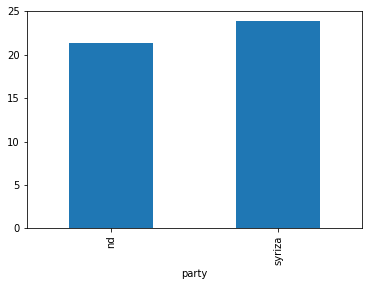

In [22]:
# M.O. αριθμού λέξεων των tweets κάθε κόμματος σε όλα τα tweets
print(f"Μ.Ο. αριθμού λέξεων σε όλα τα tweets:\n{comp.groupby('party')['words_count'].mean()}")
comp.groupby('party')['words_count'].mean().plot(kind='bar')

Μ.Ο. αριθμού λέξεων στα πρωτότυπα tweets:
party
nd        25.506402
syriza    27.500000
Name: words_count, dtype: float64


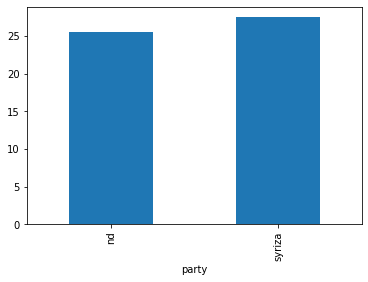

In [23]:
# M.O. αριθμού λέξεων των tweets κάθε κόμματος μόνο στα tweets που γράφουν οι ίδιοι
print(f"Μ.Ο. αριθμού λέξεων στα πρωτότυπα tweets:\n{comp[comp['retweet'] == 'no'].groupby('party')['words_count'].mean()}")
comp[comp['retweet'] == 'no'].groupby('party')['words_count'].mean().plot(kind='bar')

##**NLP Analysis**

In [24]:
#comp_nlp = comp.drop(['retweet', 'words_count'], axis=1)

#comp_nlp.head(5)

**Import libraries**

In [25]:
#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
#import numpy as np
#import seaborn as sns

####**WordCloud**

**ΝΔ**

Word cloud της ΝΔ



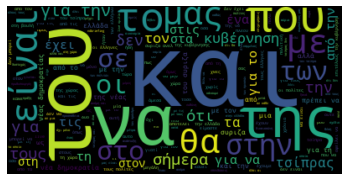

In [26]:
#filter the df to one candidate, and create a list of responses from them
nd_text = comp[comp.party == 'nd'].clean_text.tolist()

# join the list and lowercase all the words
nd_text = ' '.join(nd_text)

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(nd_text)

print("Word cloud της ΝΔ\n")
#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

**ΣΥΡΙΖΑ**

Word cloud του ΣΥΡΙΖΑ



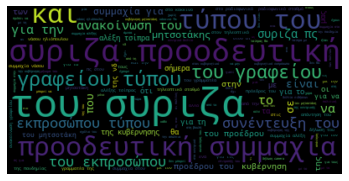

In [27]:
#filter the df to one candidate, and create a list of responses from them
syriza_text = comp[comp.party == 'syriza'].clean_text.tolist()

# join the list and lowercase all the words
syriza_text = ' '.join(syriza_text)

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(syriza_text)

print("Word cloud του ΣΥΡΙΖΑ\n")
#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

####**Spacy**

In [28]:
import spacy

In [29]:
#!python -m spacy download el_core_news_sm

In [30]:
# Φόρτωση των stop words της spacy
nlp = spacy.load('el_core_news_sm')

**ΝΔ**

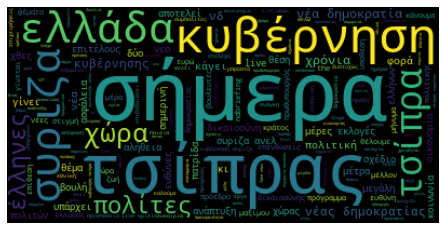

In [31]:
wordcloud = WordCloud(stopwords = nlp.Defaults.stop_words,
                      collocations=True#,
                      #min_word_length = 4,
                      #collocation_threshold = 3
                      ).generate(nd_text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**ΣΥΡΙΖΑ**

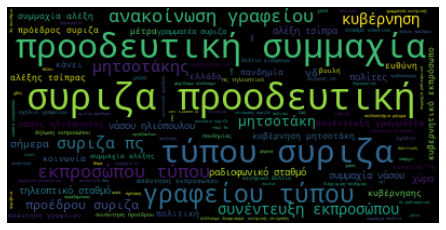

In [32]:
wordcloud = WordCloud(stopwords = nlp.Defaults.stop_words,
                      collocations=True#,
                      #min_word_length = 4,
                      #collocation_threshold = 3
                      ).generate(syriza_text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [35]:
# create a dictionary of word frequencies for ΝΔ
nd_text_dictionary = wordcloud.process_text(nd_text)
# sort the dictionary
nd_word_freq={k: v for k, v in sorted(nd_text_dictionary.items(),reverse=True, key=lambda item: item[1])}
# show results
list(nd_word_freq.items())[0:31]

[('σήμερα', 274),
 ('τσίπρας', 265),
 ('κυβέρνηση', 262),
 ('ελλάδα', 200),
 ('συριζα', 199),
 ('τσίπρα', 140),
 ('χώρα', 137),
 ('πολίτες', 136),
 ('έλληνες', 126),
 ('νέα δημοκρατία', 113),
 ('χρόνια', 112),
 ('νέας δημοκρατίας', 103),
 ('κυβέρνησης', 100),
 ('νδ', 98),
 ('νέα', 80),
 ('πολιτική', 77),
 ('κάνει', 75),
 ('φορά', 69),
 ('χώρας', 57),
 ('live', 53),
 ('συριζα ανελ', 50),
 ('θέση', 49),
 ('νέο', 49),
 ('δύο', 48),
 ('κι', 45),
 ('χθες', 45),
 ('σχέδιο', 45),
 ('ανάπτυξη', 44),
 ('μέτρα', 43),
 ('υπάρχει', 42),
 ('θέμα', 41)]

In [36]:
# create a dictionary of word frequencies for ΣΥΡΙΖΑ
syriza_text_dictionary = wordcloud.process_text(syriza_text)
# sort the dictionary
syriza_word_freq={k: v for k, v in sorted(syriza_text_dictionary.items(),reverse=True, key=lambda item: item[1])}
# show results
list(syriza_word_freq.items())[0:31]

[('συριζα προοδευτική', 1327),
 ('προοδευτική συμμαχία', 1321),
 ('τύπου συριζα', 1211),
 ('γραφείου τύπου', 682),
 ('ανακοίνωση γραφείου', 550),
 ('εκπροσώπου τύπου', 522),
 ('συριζα πς', 412),
 ('μητσοτάκης', 402),
 ('συνέντευξη εκπροσώπου', 335),
 ('κυβέρνηση', 328),
 ('μητσοτάκη', 269),
 ('προέδρου συριζα', 246),
 ('νδ', 160),
 ('σήμερα', 154),
 ('αλέξη τσίπρα', 137),
 ('νάσου ηλιόπουλου', 125),
 ('πολίτες', 120),
 ('χώρα', 115),
 ('τηλεοπτικό σταθμό', 106),
 ('ραδιοφωνικό σταθμό', 105),
 ('συμμαχία νάσου', 104),
 ('κυβέρνηση μητσοτάκη', 92),
 ('ελλάδα', 91),
 ('συμμαχία αλέξη', 89),
 ('συνέντευξη γραμματέα', 86),
 ('κοινωνία', 84),
 ('πανδημία', 82),
 ('αλέξης τσίπρας', 79),
 ('πρόεδρος συριζα', 73),
 ('μέτρα', 71),
 ('κάνει', 68)]

In [37]:
# Συμπλήρωση και update των stop words της spacy
my_stop_words = {'live', 'κι', 'χθες', 'δύο', 'σήμερα', 'ανακοίνωση', 'γραφείου', 'τύπου', 'εκπροσώπου', 'συνέντευξη', 'ημέρα', 'μέρες', 'the'} # Εδώ μπορούμε να γράψουμε λέξεις από τις παραπάνω λίστες, που θεωρούμε stop words
nlp.Defaults.stop_words.update(my_stop_words) # και μετά να τις προσθέσουμε στα stop words της spacy

In [38]:
# Δημιουργία λίστας με τα κόμματα
parties = comp.party.unique()
# create a list of responses for each candidate using a list comprehension
corpus = [' '.join(comp[(comp.party == komma)].clean_text.tolist()) for komma in parties]

corpus[0]

'στις δημοτικές εκλογές στο θέμα της ασφάλειας στην αθήνα είχα πει κάτι απλό ο δήμαρχος δεν είναι υπουργός προ πο   αν κάποιος δεν πιστεύει στην αναγκαιότητα της μικρομεσαίας επιχείρησης τότε δεν πιστεύει στο 95% της ελληνικής οικονομίας  το μεγάλο δίλημμα που έχει αυτή τη στιγμή η ελληνική κοινωνία δεν είναι βιβλιοθήκη ή βαριοπούλα αλλά αν θα πληρώσει το  το δίλημμα κ μητσοτάκη είναι αν ο κόσμος θα βγάζει ή όχι το μήνα όχι τα στημένα σκηνικά έντασης εναντίον φοιτητών απάντηση του γραφείου τύπου του συριζα προοδευτική συμμαχία στον κ μητσοτάκη   η κυβέρνηση να σταματήσει εδώ και τώρα τη βεντέτα με τους φοιτητές και τη νέα γενιά συνέντευξη του εκπροσώπου τύπου του συριζα – προοδευτική συμμαχία στον ραδιοφωνικό σταθμό στο κόκκινο 105 5 fm (αδάμ γιαννίκος)  ο πρόεδρος του συριζα προοδευτική συμμαχία αλέξης τσίπρας σήμερα παρασκευή 27 μαΐου 2022 και ώρα 17 30 θα πραγματοποιήσει συζήτηση με τη\u200b δημοσιογράφο μαρία νικόλτσιου στο πλαίσιο του συνεδρίου future of retail 2022 της εσεε στην 

**Δοκιμή για lemmatization**

In [39]:
syriza_doc = nlp(corpus[0])
lemma_syriza_doc = ' '.join(token.lemma_ for token in syriza_doc)
lemma_syriza_doc[200:400]

'το 95% της ελληνικός οικονομία   το μεγάλος δίλημμα που έχω αυτή τη στιγμή η ελληνικός κοινωνία δεν είναι βιβλιοθήκη ή βαριοπούλα αλλά αν θα πληρώσω το   το δίλημμα κ μητσοτάκη είναι αν ο κόσμος θα βγ'

In [40]:
nd_doc = nlp(corpus[1])
lemma_nd_doc = ' '.join(token.lemma_ for token in nd_doc)
lemma_nd_doc[200:400]

'ή όχι   στο όνομας ποιας ακαδημαϊκός ελευθερία μπορώ οποιαδήποτε ομάδα να κατέχω ακαδημαϊκό χώρο ανεξάρτητα από τη βούληση της πανεπιστημιακός κοινότητα ξέρω φυσικά ότι απάντηση δεν πρόκειται να πάρω '

**Παρατήρηση**

Το lemmatization τα κάνει χάλια, οπότε προτιμώ να προχωρήσω με το κείμενο ως έχει.

**Χειροκίνητη αλλαγή πτώσης ουσιαστικών**

In [41]:
comp.head(1)

party  \
0  syriza   

                                                                                                          clean_text  \
0  στις δημοτικές εκλογές στο θέμα της ασφάλειας στην αθήνα είχα πει κάτι απλό ο δήμαρχος δεν είναι υπουργός προ πο    

  retweet  words_count  
0     yes           20

In [59]:
comp['lemma_text'] = comp['clean_text']
comp['lemma_text'] = comp['lemma_text'].str.replace(r'τσίπρα\s', 'τσίπρας ').str.replace(r'νέας δημοκρατίας', 'νέα δημοκρατία').str.replace(r'καμμένου', 'καμμένος').str.replace('πανδημίας', 'πανδημία')
comp['lemma_text'] = comp['lemma_text'].str.replace(r'χώρας', 'χώρα').str.replace(r'πς', 'προοδευτική συμμαχία').str.replace(r'πολιτικής', 'πολιτική').str.replace(r'πολιτών', 'πολίτες')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWar

In [60]:
# Update της λίστας με τα κόμματα μετά το lemmatization
corpus = [' '.join(comp[(comp.party == komma)].lemma_text.tolist()) for komma in parties]

corpus[0]

'στις δημοτικές εκλογές στο θέμα της ασφάλειας στην αθήνα είχα πει κάτι απλό ο δήμαρχος δεν είναι υπουργός προ πο   αν κάποιος δεν πιστεύει στην αναγκαιότητα της μικρομεσαίας επιχείρησης τότε δεν πιστεύει στο 95% της ελληνικής οικονομίας  το μεγάλο δίλημμα που έχει αυτή τη στιγμή η ελληνική κοινωνία δεν είναι βιβλιοθήκη ή βαριοπούλα αλλά αν θα πληρώσει το  το δίλημμα κ μητσοτάκη είναι αν ο κόσμος θα βγάζει ή όχι το μήνα όχι τα στημένα σκηνικά έντασης εναντίον φοιτητών απάντηση του γραφείου τύπου του συριζα προοδευτική συμμαχία στον κ μητσοτάκη   η κυβέρνηση να σταματήσει εδώ και τώρα τη βεντέτα με τους φοιτητές και τη νέα γενιά συνέντευξη του εκπροσώπου τύπου του συριζα – προοδευτική συμμαχία στον ραδιοφωνικό σταθμό στο κόκκινο 105 5 fm (αδάμ γιαννίκος)  ο πρόεδρος του συριζα προοδευτική συμμαχία αλέξης τσίπρας σήμερα παρασκευή 27 μαΐου 2022 και ώρα 17 30 θα πραγματοποιήσει συζήτηση με τη\u200b δημοσιογράφο μαρία νικόλτσιου στο πλαίσιο του συνεδρίου future of retail 2022 της εσεε στην 

In [61]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv = CountVectorizer( stop_words = nlp.Defaults.stop_words, ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow = pd.DataFrame(X, columns = cv.get_feature_names())
bow.index = parties

print(bow.shape)
bow.head()

(2, 127184)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00  00 14ο  00 14ο συνέδριό  00 30  00 30 δεύτερο  00 real  \
syriza  32       0                0      0              0        1   
nd       9       1                1      1              1        0   

        00 real δημοσιογράφο  00 άξιος  00 άξιος νέος  00 ακυρώθηκε  ...  \
syriza                     1         1              1             1  ...   
nd                         0         0              0             0  ...   

        ώρες συμφωνεί δηλώσεις  ώρες φορές  ώρες φορές πρωινή  ώρες φτωχά  \
syriza                       1           1                  1           1   
nd                           0           0                  0           0   

        ώρες φτωχά εκφράζω  ώρες ύπνο  ώρες ύπνο κάνει  ώριμη  ώριμη δύναμη  \
syriza                   1          1                1      0             0   
nd                       0          0                0      1             1   

        ώριμη δύναμη διπλό  
syriza                   0  
nd                       1  

[2 rows x 127184 columns]

**ΝΔ**

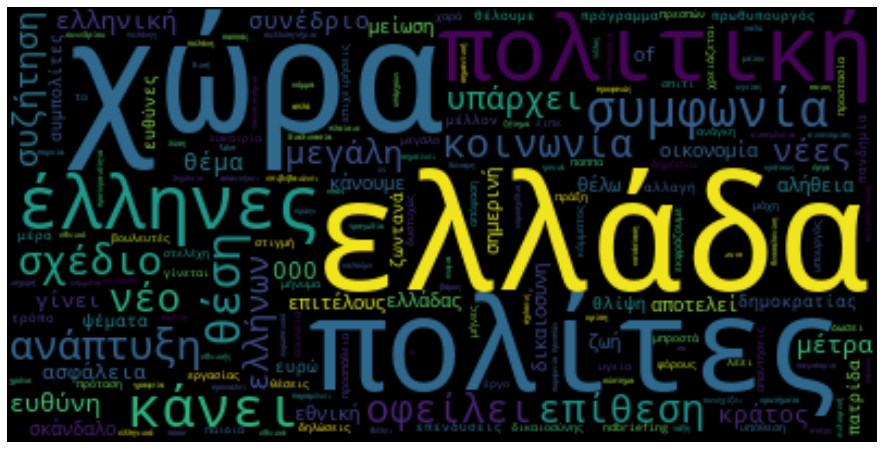

In [62]:
# create a pandas Series of the top 200 most frequent words
text1=bow.loc['nd'].sort_values(ascending=False)[:200]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text1_dict=bow.loc['nd'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(#min_word_length =3,
                      #background_color='white'
                      )

# generate the word cloud
wordcloud.generate_from_frequencies(text1_dict)

#plot
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**ΣΥΡΙΖΑ**

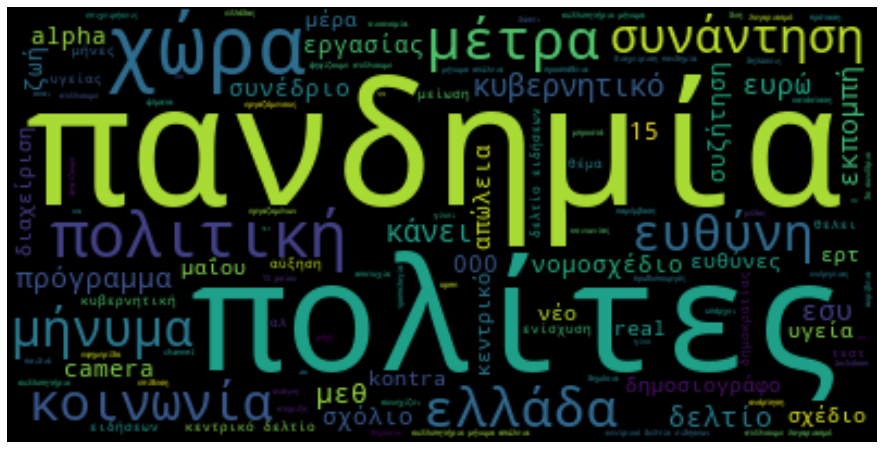

In [63]:
# create a pandas Series of the top 200 most frequent words
text2=bow.loc['syriza'].sort_values(ascending=False)[:500]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['syriza'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(#min_word_length =3,
                      #background_color='white'
                      )

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

####**Αφαίρεση κι άλλων stop words**

Θα πετάξω τις αυτοαναφορικές λέξεις και τις λέξεις που αναφέρονται στον αντίπαλο για να δω πέρα από την αυτοπροβολή και την αναφορά στον αντίπαλο, με τι θέματα ασχολούνται

In [64]:
# Συμπλήρωση και update των stop words της spacy
my_new_stop_words = {'σύριζα', 'συριζα', 'προοδευτική', 'συμμαχία', 'τσίπρας', 'προέδρου', 'μητσοτάκη', 'μητσοτάκης', 'αλέξης', 'νάσου', 'ηλιόπουλου', 'κυβέρνηση', 'νέα', 'δημοκρατία', 'πρόεδρο', 'νδ', 'κυβέρνησης', 'ανελ', 'καμμένος', 'δήλωση', 'απάντηση', 'αλέξη', 'κόκκινο', 'fm', 'τηλεοπτικό', 'σταθμό', 'γραμματέα', 'ηλιόπουλος', 'στ', 'φορά', 'εκλογές', 'μαξίμου', 'εκπρόσωπος', 'χρόνια', 'ραδιοφωνικό', '105', 'νάσος', 'εκπρόσωπο', 'βουλή', 'επιτροπής', 'ομιλία', 'κεντρικής', 'πρόεδρος', 'on', 'ώρα'} # Εδώ μπορούμε να γράψουμε λέξεις από τις παραπάνω λίστες, που θεωρούμε stop words
nlp.Defaults.stop_words.update(my_new_stop_words) # και μετά να τις προσθέσουμε στα stop words της spacy

In [48]:
# import CountVectorizer
#from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv = CountVectorizer( stop_words = nlp.Defaults.stop_words, ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow = pd.DataFrame(X, columns = cv.get_feature_names())
bow.index = parties

print(bow.shape)
bow.head()

(2, 127203)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00  00 14ο  00 14ο συνέδριό  00 30  00 30 δεύτερο  00 real  \
syriza  32       0                0      0              0        1   
nd       9       1                1      1              1        0   

        00 real δημοσιογράφο  00 άξιος  00 άξιος νέος  00 ακυρώθηκε  ...  \
syriza                     1         1              1             1  ...   
nd                         0         0              0             0  ...   

        ώρες συμφωνεί δηλώσεις  ώρες φορές  ώρες φορές πρωινή  ώρες φτωχά  \
syriza                       1           1                  1           1   
nd                           0           0                  0           0   

        ώρες φτωχά εκφράζω  ώρες ύπνο  ώρες ύπνο κάνει  ώριμη  ώριμη δύναμη  \
syriza                   1          1                1      0             0   
nd                       0          0                0      1             1   

        ώριμη δύναμη διπλό  
syriza                   0  
nd                       1  

[2 rows x 127203 columns]

**ΝΔ**

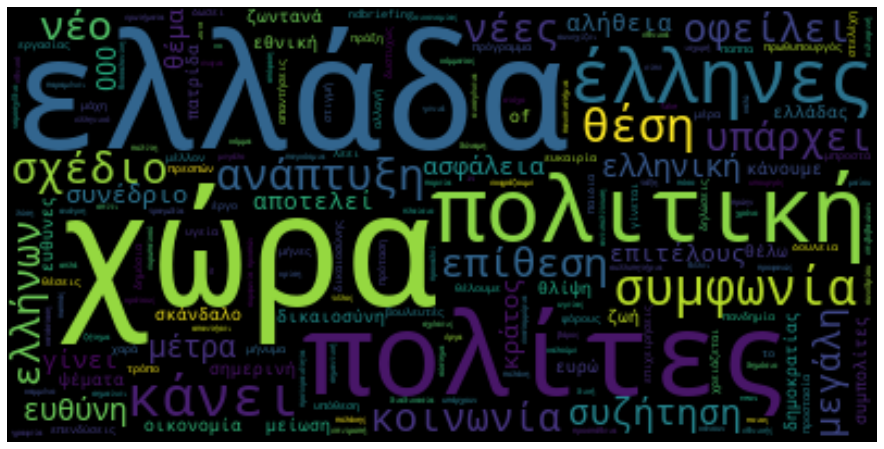

In [65]:
# create a pandas Series of the top 200 most frequent words
text1=bow.loc['nd'].sort_values(ascending=False)[:200]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text1_dict=bow.loc['nd'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(#min_word_length =3,
                      #background_color='white'
                      )

# generate the word cloud
wordcloud.generate_from_frequencies(text1_dict)

#plot
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**ΣΥΡΙΖΑ**

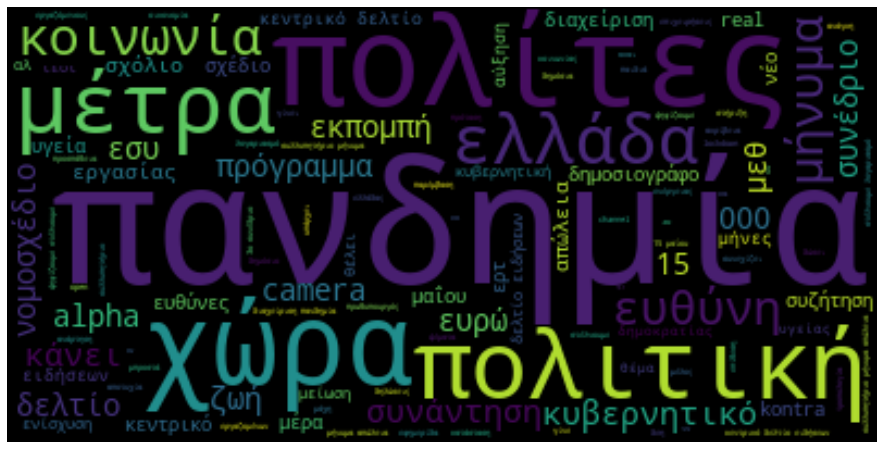

In [66]:
# create a pandas Series of the top 200 most frequent words
text2=bow.loc['syriza'].sort_values(ascending=False)[:500]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['syriza'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(#min_word_length =3,
                      #background_color='white'
                      )

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

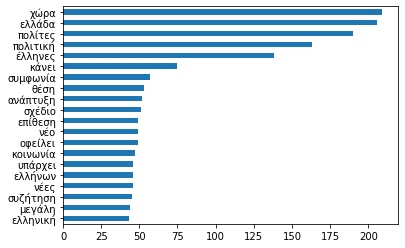

In [67]:
bow.loc['nd'].sort_values(ascending=False)[:20].plot(kind='barh').invert_yaxis()

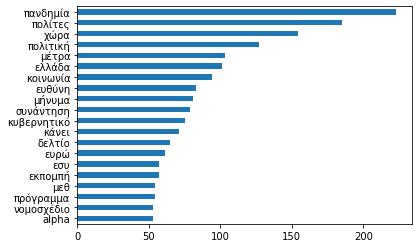

In [68]:
bow.loc['syriza'].sort_values(ascending=False)[:20].plot(kind='barh').invert_yaxis()

##**Απαντήσεις στα ερωτήματα**
---
**Πόσο συχνά γράφουν tweets?**

Ο ΣΥΡΙΖΑ στέλνει κατά μ.ο. περισσότερο από διπλάσια tweets την ημέρα από τη ΝΔ:
* Μ.Ο. tweets/ημέρα της ΝΔ: 2.3240343347639487
* Μ.Ο. tweets/ημέρα του ΣΥΡΙΖΑ: 5.793226381461675
---
**Ποια μέρα έστειλαν τα περισσότερα tweets?**

Και τα 2 κόμματα έστειλαν τα περισσότερα tweets την ημέρα του συνεδρίου τους:
* η ΝΔ στις 17/12/2017 (16 tweets) και 
* ο ΣΥΡΙΖΑ στις 14/4/2022 (25 tweets)
---
**Ποιoς κάνει τα περισσότερα retweets?**

Tα περισσότερα retweets τα κάνει η ΝΔ.
* Retweets της ΝΔ: 1687
* Retweets του ΣΥΡΙΖΑ: 1268

Δεδομένου ότι ο συνολικός αριθμός των εξεταζόμενων tweets και για τα δύο κόμματα είναι o ίδιος (ΝΔ: 3249, ΣΥΡΙΖΑ: 3250), σχεδόν τα μισά tweets της ΝΔ είναι retweets.

---
**Πόση είναι η μέση έκταση σε λέξεις ή χαρακτήρες των tweets που γράφουν?**

Καθώς α) στα retweets το κείμενο του αρχικού tweet δεν περιλαμβάνεται ολόκληρο και β) τα retweets δεν είναι κείμενο που γράφουν τα γραφεία τύπου των κομμάτων, προσμετρήσαμε και εξετάσαμε τόσο όλα τα tweets, όσο και μόνο τα tweets που έστειλαν τα ίδια τα κόμματα χωρίς τα retweets που έκαναν.

Τα tweets των δύο κομμάτων έχουν και στις δύο περιπτώσεις κατά μ.ο. παρόμοιο αριθμό λέξεων:
* Μ.Ο. αριθμού λέξεων σε όλα τα tweets:
  * ΝΔ: 21.312712
  * ΣΥΡΙΖΑ: 23.826154

* Μ.Ο. αριθμού λέξεων στα πρωτότυπα tweets:
  * ΝΔ: 25.506402
  * ΣΥΡΙΖΑ: 27.500000

---
**Με ποια θέματα ασχολούνται περισσότερο?**

**Έχουν διαφορά τα wordclouds τους και πώς την ερμηνεύετε?**

Τα wordcloud τους έχουν αρκετές ομοιότητες, αλλά και διαφορές. Οι ομοιότητες είναι ότι και τα δύο κόμματα επικεντρώνονται στα εσωτερικά τους και στη μεταξύ τους αντιπαράθεση: *προβάλλουν τις κομματικές τους δράσεις και θέσεις και ο ένας αναφέρεται στα στραβά του άλλου*. Επίσης αναφέρονται στην Ελλάδα, στη χώρα, στους Έλληνες, στους πολίτες, στην κοινωνία και άλλα γενικόλογα.

Στις διαφορές, όπως φαίνονται μετά την αφαίρεση των κοινότυπων λέξεων, θα έλεγα ότι η ΝΔ αναφέρεται περισσότερο σε θετικές έννοιες, όπως η ανάπτυξη και η ύπαρξη σχεδίου, ενώ ο ΣΥΡΙΖΑ περισσότερο σε θέματα που μπορεί να ασκήσει κριτική στην κυβέρνηση, όπως η συγκυριακή πανδημία και η ευθύνη. Στα tweets του ΣΥΡΙΖΑ υπάρχουν πάρα πολλές αναφορές στην τηλεόραση και το ραδιόφωνο.

Θα ήταν καλό να έχουμε περισσότερα tweets και από την περίοδο που οι κοινοβουλευτικοί τους ρόλοι ήταν αντίστροφοι. 

##**Τσαχπινιές**

https://mubaris.com/posts/dataviz-wordcloud/

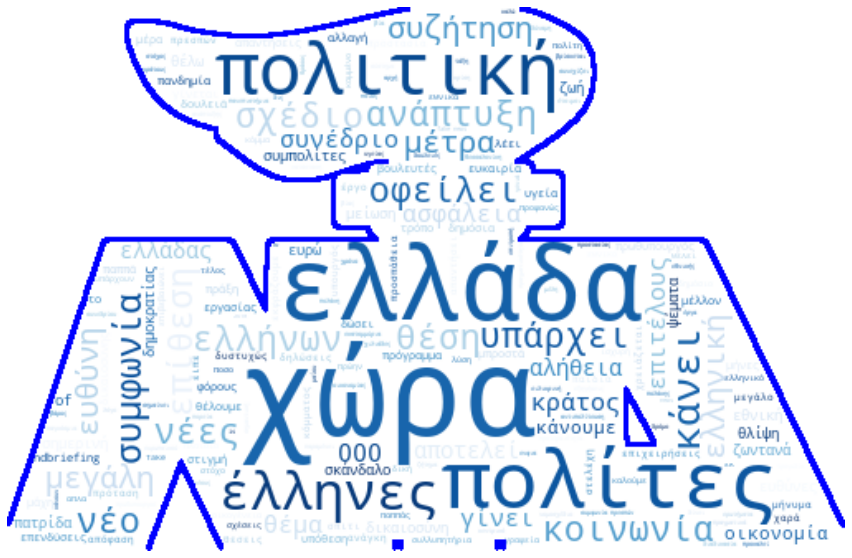

In [69]:
import numpy as np

### colormap

# open the image and use np.array to transform the file to an array

cand_mask=np.array(Image.open('gdrive/My Drive/Colab Notebooks/Scraping/tweets/CSVs/Νέα Δημοκρατία/New_Democracy.png'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


#create and generate our wordcloud object
wordcloud = WordCloud(#font_path = 'font\\GothamMedium.ttf',
                      background_color='white',
                      contour_color='blue',
                      mask=cand_mask, colormap='Blues',
                      contour_width=4).generate_from_frequencies(text1_dict)


#plot
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

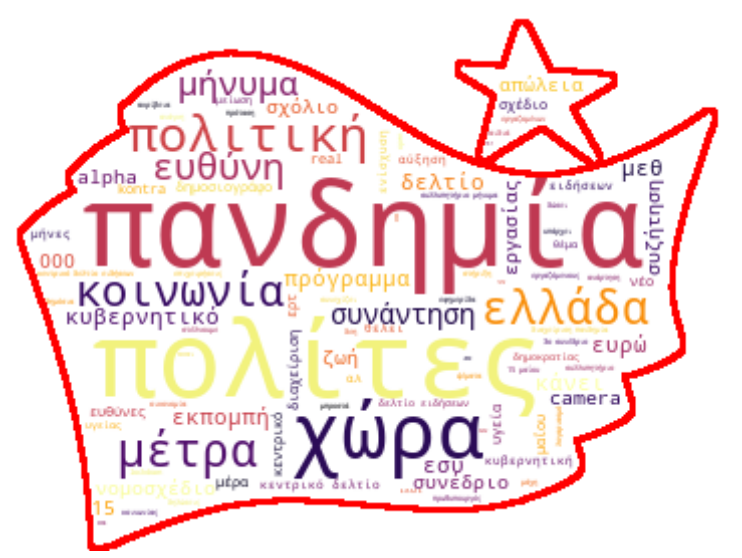

In [70]:
### colormap

# open the image and use np.array to transform the file to an array

cand_mask=np.array(Image.open('gdrive/My Drive/Colab Notebooks/Scraping/tweets/CSVs/Σύριζα/SYRIZA.png'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


#create and generate our wordcloud object
wordcloud = WordCloud(#font_path = 'font\\GothamMedium.ttf',
                      background_color='white',
                      contour_color='red',
                      mask=cand_mask, colormap=mpl.cm.inferno,
                      contour_width=4).generate_from_frequencies(text2_dict)


#plot
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()